<a href="https://colab.research.google.com/github/hernanmorales-navarrete/EPIC_3/blob/main/Day_2/Image_classifier_2classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classifier using Convolutional Neural Network implemented in Keras

- This is a tutorial on the basics for setting up an image classififier using CNN
- These materials have been adapted from the original versions:
    - "Image Classifier:" https://github.com/gsurma/image_classifier/tree/master


## 1. Importing Modules & Packages

In [ ]:
!pip install livelossplot
!pip install efficientnet
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.optimizers import RMSprop
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Loading Image Data

In [ ]:
# Create string variables for the path and the name of the file to load (r before your string creates a 'raw string')

TRAINING_LOGS_FILE = "training_logs.csv"
MODEL_SUMMARY_FILE = "model_summary.txt"
MODEL_FILE = "zebrafish.h5"

# Data
path = r"/content/drive/MyDrive/IntroBioImageAnalysis-main/zebrafish/"
training_data_dir = path + "training"
validation_data_dir = path + "validation"
test_data_dir = path + "test"

print(training_data_dir)

/content/drive/MyDrive/IntroBioImageAnalysis-main/zebrafish/training


In [ ]:
# Hyperparams
IMAGE_SIZE = 200
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 20
BATCH_SIZE = 32
TEST_SIZE = 30
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)


In [ ]:
# Simple CNN Modelmodel = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(16))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

In [ ]:
# Data augmentation
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
# Data preparation
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary",
    shuffle=False)



Found 940 images belonging to 2 classes.
Found 842 images belonging to 2 classes.
Found 341 images belonging to 2 classes.


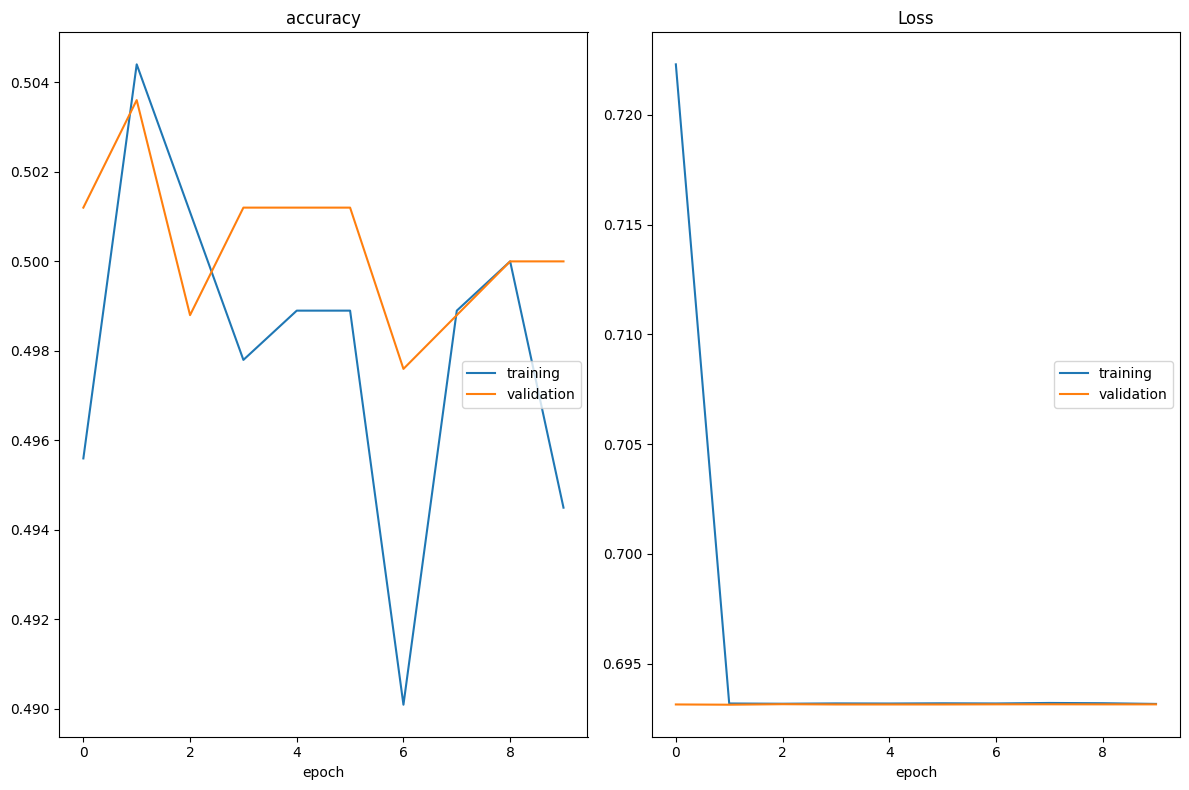

accuracy
	training         	 (min:    0.490, max:    0.504, cur:    0.494)
	validation       	 (min:    0.498, max:    0.504, cur:    0.500)
Loss
	training         	 (min:    0.693, max:    0.722, cur:    0.693)
	validation       	 (min:    0.693, max:    0.693, cur:    0.693)
29/29 [==============================] - 45s 2s/step - loss: 0.6932 - accuracy: 0.4945 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 11/20
17/29 [================>.............] - ETA: 13s - loss: 0.6931 - accuracy: 0.5092

KeyboardInterrupt: ignored

In [ ]:


# Training
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    callbacks=[PlotLossesCallback(), CSVLogger(TRAINING_LOGS_FILE,
                                            append=False,
                                            separator=";")],
    verbose=1)
model.save_weights(MODEL_FILE)

In [ ]:
# Testing
probabilities = model.predict_generator(test_generator, TEST_SIZE)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% Normal")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% BMP")
    plt.show()


In [ ]:
#Model 2

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#Model 3
	model = Sequential()

	model.add(Conv2D(32, (3, 3), input_shape=input_shape))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Conv2D(64, (3, 3)))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Conv2D(128, (3, 3)))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Flatten())
	model.add(Dense(64))
	model.add(Activation('relu'))
	model.add(Dense(1))
	model.add(Activation('sigmoid'))

	model.compile(loss='binary_crossentropy',
          		optimizer='rmsprop',
          		metrics=['accuracy'])
#Model 4

	model = Sequential()

	model.add(Conv2D(32, (3, 3), input_shape=input_shape))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Conv2D(64, (3, 3)))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Conv2D(128, (3, 3)))
	model.add(Activation('relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))

	model.add(Flatten())
	model.add(Dense(128))
	model.add(Activation('relu'))
	model.add(Dropout(0.5))
	model.add(Dense(1))
	model.add(Activation('sigmoid'))

	model.compile(loss='binary_crossentropy',
          		optimizer='rmsprop',
          		metrics=['accuracy'])



